In [81]:
import matplotlib
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
import matplotlib.pyplot as plt


In [82]:

# Do some global setup so all of our graphs have the same look

def basis_activation(i, knots, k, x):
    """ calculate the value of the i-th B-spline basis function of degree k at x """
    if k == 0:
        return float(knots[i] <= x < knots[i + 1])
    else:
        denom1 = knots[i + k] - knots[i]
        denom2 = knots[i + k + 1] - knots[i + 1]
        term1 = (basis_activation(i, knots, k - 1, x) * (x - knots[i]) / denom1) if denom1 > 0 else 0
        term2 = (basis_activation(i + 1, knots, k - 1, x) * (knots[i + k + 1] - x) / denom2) if denom2 > 0 else 0
        return term1 + term2

def setup_graph():
    plt.xlim(-1, 8)
    plt.ylim(-1, 2)
    plt.xticks(range(8))
    plt.yticks([0, 1])
    plt.axhline(0, color='black', ls='--')
    plt.axvline(0, color='black', ls='--')

def setup_just_text():
    fig = plt.gca()
    fig.axes.get_xaxis().set_visible(False)                                         
    fig.axes.get_yaxis().set_visible(False)   
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    fig.spines['bottom'].set_visible(False)
    fig.spines['left'].set_visible(False)

knots = list(range(9))
x = [x/10 for x in range(-10,100)]

image_folder_name = "generated_images"

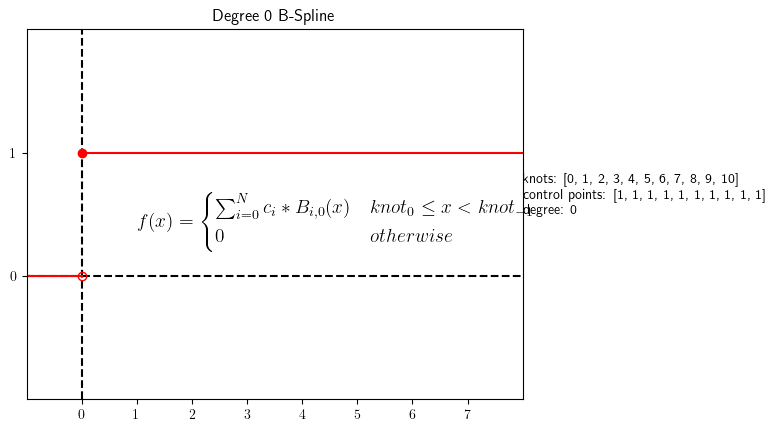

In [83]:
# function_tex_string=r"""$
# f(x) = 
# \begin{cases}
# 1 &  0 \leq x < 1\\
# 0 & otherwise
# \end{cases}
# $
# """

function_tex_string=r"$f(x) = \begin{cases} \sum_{i=0}^{N} c_i * B_{i,0}(x) &  knot_0 \leq x < knot_{-1}\\ 0 & otherwise \end{cases}$"

setup_graph()
plt.plot([0, 10], [1, 1], "ro-")
plt.plot([-2,0], [0,0], "ro-", fillstyle='none')
plt.plot([10,12], [0,0], "ro-", fillstyle='none')
plt.title("Degree 0 B-Spline")
# put text to the right of the plot
plt.text(8.0, 0.5, f"knots:    {list(range(0,11))}\ncontrol points:    {[1]*10}\ndegree: 0",)
plt.text(1.0,0.4, function_tex_string, fontsize=14)
# show
with open(f"{image_folder_name}/bspline_degree_0.png", "wb") as file:
    plt.savefig(file)
plt.show()

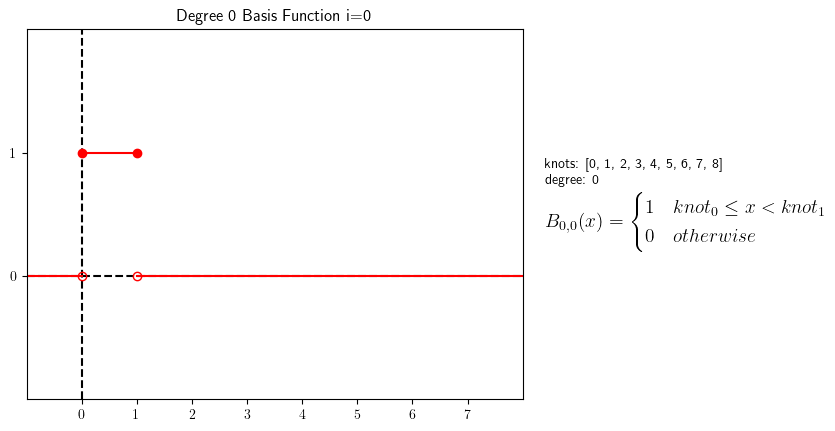

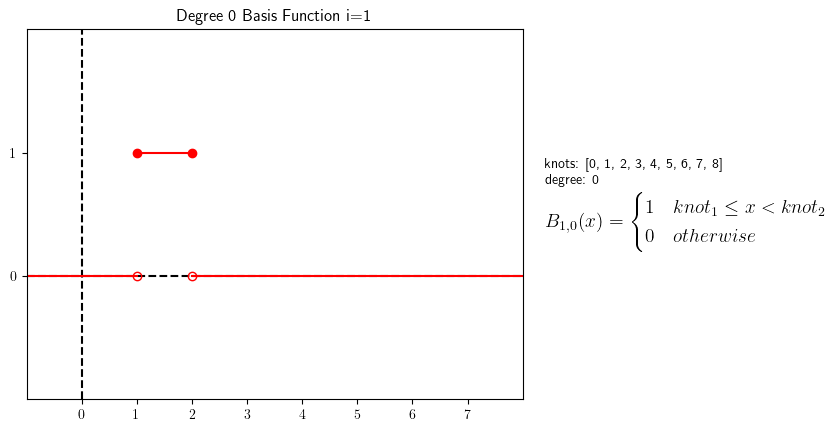

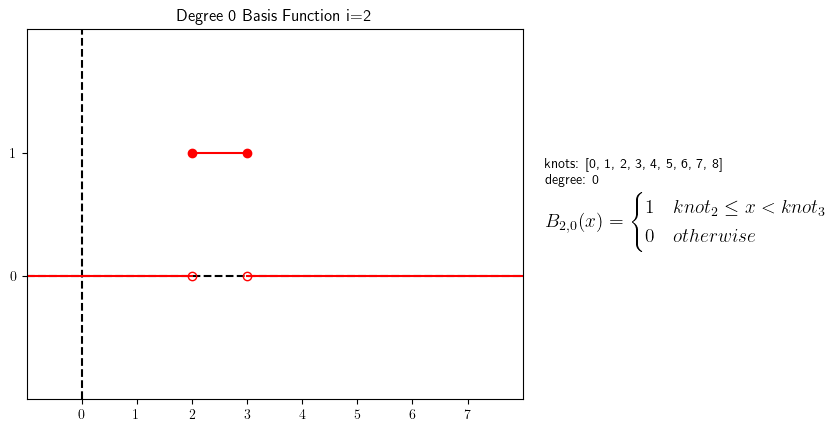

In [84]:
text_left = 8.4
text_bottom = 0.4
for i in range (3):
    function_tex_string=r"$B_{" + str(i) + r",0}(x) = \begin{cases} 1 &  knot_{" + str(i) + r"} \leq x < knot_{" + str(i + 1) + r"}\\ 0 & otherwise \end{cases}$"
    plt.title(f"Degree 0 Basis Function i={i}") 
    setup_graph()
    plt.plot([-2,i], [0,0], "ro-", fillstyle='none')
    plt.plot([i,i+1], [1,1], "ro-")
    plt.plot([i+1,12], [0,0], "ro-", fillstyle='none')
    plt.text(text_left, text_bottom + 0.35, f"knots:    {knots}\ndegree: 0",)
    plt.text(text_left, text_bottom, function_tex_string, fontsize=14)
    with open(f"{image_folder_name}/bspline_degree_0_basis_{i}.png", "wb") as file:
        plt.savefig(file, bbox_inches='tight')
    plt.show()


$$
B_{i,k}(x) = 
\frac{x-knot_i}{knot_{i+k}-knot_{i}}B_{i, k-1}(x) + \frac{knot_{i+k}-x}{knot_{i+k+1}-knot_{i+1}}B_{i+1,k-1}(x)
$$

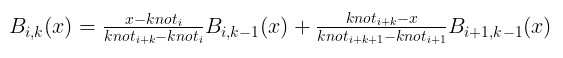

In [85]:
latex_expression = r"$B_{i,k}(x) = \frac{x-knot_i}{knot_{i+k}-knot_{i}}B_{i, k-1}(x) + \frac{knot_{i+k}-x}{knot_{i+k+1}-knot_{i+1}}B_{i+1,k-1}(x)$"
fig = plt.figure(figsize=(3, 0.5))  # Dimensions of figsize are in inches
text = fig.text(
    x=0.5,  # x-coordinate to place the text
    y=0.5,  # y-coordinate to place the text
    s=latex_expression,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=16,
)
fig.savefig(f"{image_folder_name}/bspline_formula.png", bbox_inches="tight")

setup_just_text() # unsure why this makes the difference between the text showing or not, but it does

plt.show()


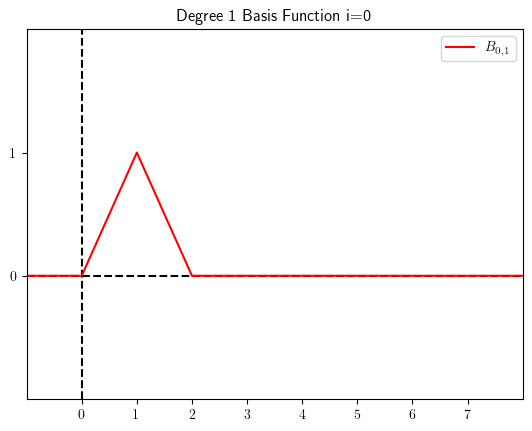

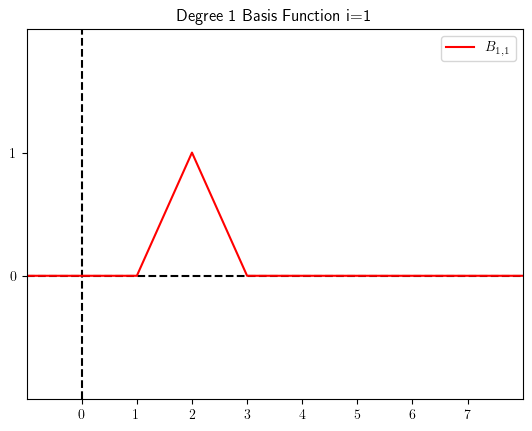

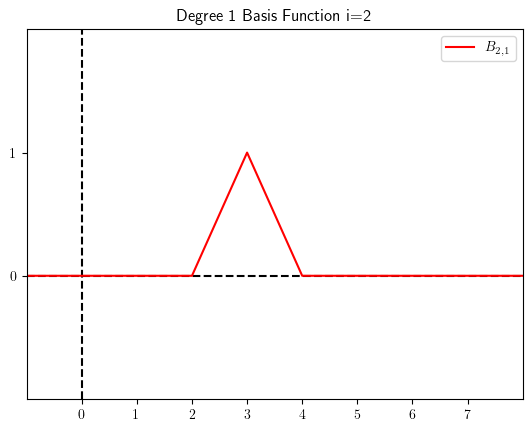

In [86]:
# Plot the first three basis functions for a degree 1 B-spline

for i in range(3):
    y = [basis_activation(i, knots, 1, x_i) for x_i in x]
    plt.title(f"Degree 1 Basis Function i={i}")
    setup_graph()
    plt.plot(x, y, label=f"$B_{{{i},1}}$", color="red")
    plt.legend()
    plt.savefig(f"{image_folder_name}/bspline_degree_1_basis_{i}.png", bbox_inches='tight')
    plt.show()

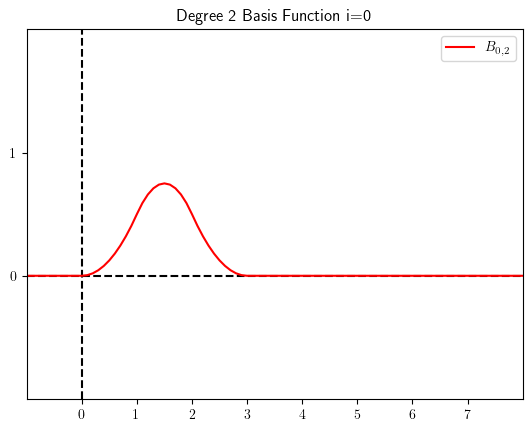

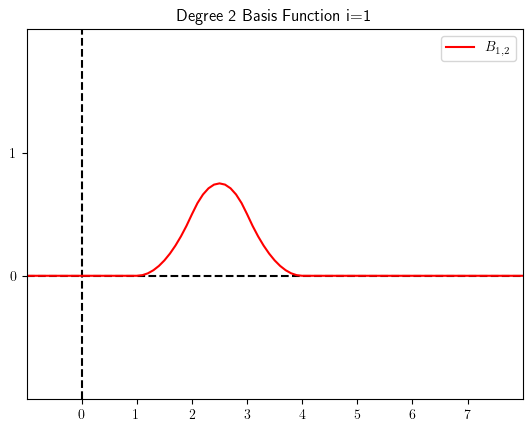

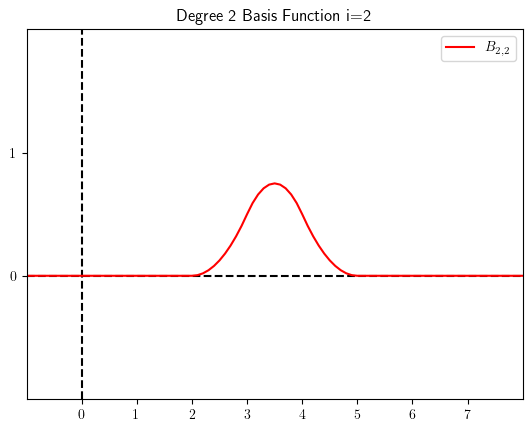

In [87]:
# Plot the first three basis functions for a degree 2 B-spline
for i in range(3):
    y = [basis_activation(i, knots, 2, x_i) for x_i in x]
    plt.title(f"Degree 2 Basis Function i={i}")
    setup_graph()
    plt.plot(x, y, label=f"$B_{{{i},2}}$", color="red")
    plt.legend()
    plt.savefig(f"{image_folder_name}/bspline_degree_2_basis_{i}.png", bbox_inches='tight')
    plt.show()

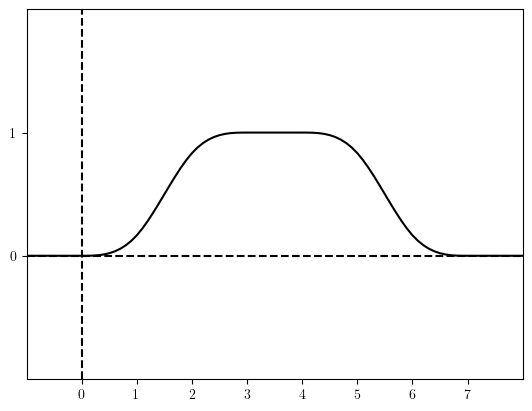

In [88]:
# Degree 3 B-spline with all basis activations and control points set to 1

setup_graph()
b0 = [basis_activation(0, knots, 3, x_i) for x_i in x]
b1 = [basis_activation(1, knots, 3, x_i) for x_i in x]
b2 = [basis_activation(2, knots, 3, x_i) for x_i in x]
b3 = [basis_activation(3, knots, 3, x_i) for x_i in x]
full_spline = [b0_i + b1_i + b2_i + b3_i for b0_i, b1_i, b2_i, b3_i in zip(b0, b1, b2, b3)]
plt.plot(x, full_spline, label="spline", color="black")

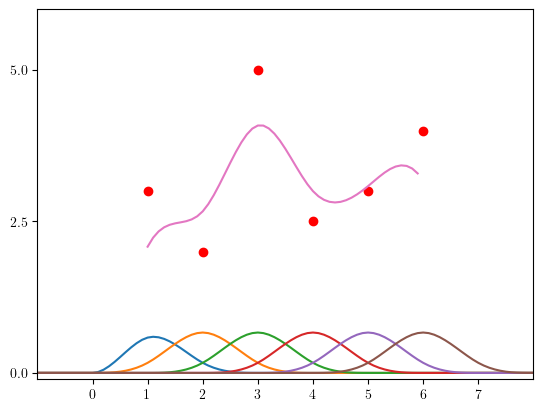

In [89]:
# basline b-spline demonstrator graph
knots = [0] + list(range(0, 10)) 
x = [x/10 for x in range(-10, 100)]

fig, ax = plt.subplots()
# set the x-axis to -1 to 11
ax.set_xlim(-1, 8)
ax.set_ylim(-0.1, 6.0)
ax.set_xticks(range(0, 8))
ax.set_yticks([0, 2.5, 5])

# plot the 6 basis functions
for i in range(6):
    ax.plot(x, [basis_activation(i, knots, 3, xi) for xi in x], label=f'B{i}')

control_points = [3, 2, 5, 2.5, 3, 4]

# plot the control points as unconnected red dots
ax.plot(range(1,7), control_points, 'ro')

# plot the linear combination of the basis functions, but only in the x range [1, 6]
x = [x/10 for x in range(10, 60)]
ax.plot(x, [sum(control_points[i] * basis_activation(i, knots, 3, xi) for i in range(6)) for xi in x ], label='Spline')
